### What is a regression problem?

* **How much** will this house sell for?
* **How many** people will by this app?
* **How much** will my health insurance be?
* **How much** should I save each week for fuel?

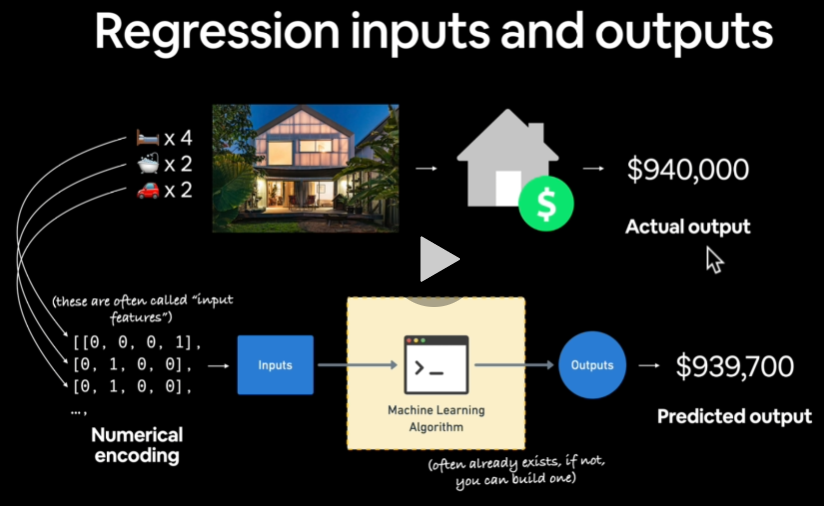

Predicting a numerical variable based on some other combination of variables

### Imports

In [ ]:
# Import TensorFlow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Creating data to view and fit

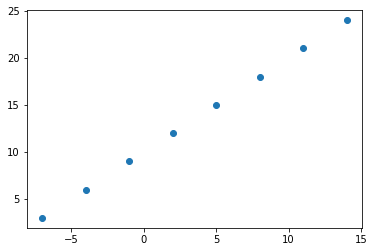

In [ ]:
# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [ ]:
# The relationship between X and y is +10
# This is the relationship between depend variables(X) and independent variables(y)
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price predication problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

### There's a lot missing here....

### How to load and save a TensorFlow model

There are two main formats we can save out models to:
1. The SavedModel format
2. The HDF5 format(more universal?)

In [ ]:
# Save model using the SavedModel format
model.save("SavedModel_Format")

In [ ]:
# HDF5 format
model.save('model.h5')

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("<file path>")
loaded_SavedModel_format.summary()

### Download a model (or any othe file) from Google Colab

If you want to download a file from Google Colab

1. Go to the Files tab on the left and right-click > download
2. Use code (see the cell below)
3. Mount Google Drive and copy there

In [ ]:
# Download a file from Goolge Colab
from google.colab import files
files.download("<file path>")

In [ ]:
# Copy to Google Drive
!cp <target file path> <destination path>

### A Larger Example


In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
 # One-hot encode dataframe so that it's all numbers.
 # pd.get_dummies() will auto create one-hot encoded columns based on number of options for each object type label (sex has 2 options)
 insurance_one_hot = pd.get_dummies(insurance)
 insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels). .drop will drop the specified column
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test data
# train_test_split from sklearn.model_selection will randomly split data into train and test
# test_size sets the percentage of data (1.0 - 0.0) to set aside as test data. 0.2 = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                                     
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit the model
insurance_model.fit(X_train,y_train, epochs=100, verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# Is a error of 7023 learge compared to our training data? Yes. Look at y_train...
y_train, y_train.median(), y_train.mean()

(560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
            ...     
 1095     4561.18850
 1130     8582.30230
 1294    11931.12525
 860     46113.51100
 1126    10214.63600
 Name: charges, Length: 1070, dtype: float64, 9575.4421, 13346.089736364489)

Right now it looks like our model isn't performing too well...let's try to improve it.

To try improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
# Adding another layer makes the model too complex for SGD optimizer and you'll get output "nan" when fitting
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile
# Changing the optimizer to Adam allows the use of more layers over SGD and improves mae
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit
# Running for more epochs improves mae
insurance_model_2.fit(X_train, y_train, epochs=500, verbose=0)

NameError: ignored

In [ ]:
# Evaluate
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3222.2605 - mae: 3222.2605


[3222.260498046875, 3222.260498046875]

### Doing it with AutoKeras

In [ ]:
# Testing out AutoKeras
!pip install AutoKeras
import autokeras as ak
from autokeras import StructuredDataRegressor

     |████████████████████████████████| 174kB 4.3MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
  Created wheel for kt-legacy: filename=kt_legacy-1.0.3-cp37-none-any.whl size=9569 sha256=617becb6de953be5557f1ab48989d8f064789bd161cff0c20685ca60aefc1aad
  Stored in directory: /root/.cache/pip/wheels/95/99/a8/6b116b0f69be60cc475d1cd36680f3a09f284d86655bb99d93
Successfully built kt-legacy


In [ ]:
# define the model search
search = StructuredDataRegressor(max_trials=15, loss='mean_absolute_error')

In [ ]:
search.fit(x=X_train, y=y_train, verbose=0)

INFO:tensorflow:Oracle triggered exit
Epoch 1/53
34/34 [==============================] - 1s 5ms/step - loss: 13340.2080 - mean_squared_error: 322297600.0000
Epoch 2/53
34/34 [==============================] - 0s 5ms/step - loss: 13324.7842 - mean_squared_error: 321875840.0000
Epoch 3/53
34/34 [==============================] - 0s 5ms/step - loss: 13295.0186 - mean_squared_error: 321096704.0000
Epoch 4/53
34/34 [==============================] - 0s 5ms/step - loss: 13243.6982 - mean_squared_error: 319761536.0000
Epoch 5/53
34/34 [==============================] - 0s 5ms/step - loss: 13168.0439 - mean_squared_error: 317823104.0000
Epoch 6/53
34/34 [==============================] - 0s 5ms/step - loss: 13062.6025 - mean_squared_error: 315159520.0000
Epoch 7/53
34/34 [==============================] - 0s 5ms/step - loss: 12937.5859 - mean_squared_error: 311918112.0000
Epoch 8/53
34/34 [==============================] - 0s 5ms/step - loss: 12791.2383 - mean_squared_error: 307999072.0000
Ep

Seems to be worse.....

### Continuing lesson

In [ ]:
# Plotting history (also known as a loss curve or training curve)
history = insurance_model_2.fit(X_train,y_train,epochs=500, verbose=0)
pd.DateFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

NameError: ignored

**Question:** How long should you train for?
It depends. TensorFlow has a solution. It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

### Preprocessing data (normalization and standardization)
* The goal of normalization is to change the values of numeric columns in the dataset to a common scale: MinMaxScaler
* Standardization - Removes the mean and divides each value by the standard deviation. Transforms a feature to have close to normal distribution(reduces the effect of outliers): StandardScaler

In terms of scaling values, neural networkds tend to prefer normalization. If you're not sure which to use, try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (minmaxscaler) and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Our data has been normalized and one hot encoded. Now let's build a neural network model on our normalized data

In [ ]:
tf.random.set_seed(42)

# Create the model
insurance_model_normal = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_normal.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=["mae"])

# Fit the model
insurance_model_normal.fit(X_train_normal,y_train,epochs=500,verbose=0)

In [ ]:
# Evaluate
insurance_model_normal.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.7495 - mae: 3160.7495


[3160.74951171875, 3160.74951171875]